In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
a=pd.read_excel('data.xlsx',sheet_name='Weather')

In [3]:
a.head()

,temp,location,clouds,pressure,rain,time_stamp,Date,humidity,wind,Time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,2018-12-16 18:45:01,0.77,11.25,18
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,2018-12-16 18:45:01,0.76,11.32,18
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,2018-12-16 18:45:01,0.76,11.07,18
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,2018-12-16 18:45:01,0.77,11.09,18
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,2018-12-16 18:45:01,0.75,11.49,18


In [4]:
b= pd.read_excel('data.xlsx',sheet_name='Cab_data')

In [5]:
b.head()

,distance,cab_type,time_stamp,Date,Time,destination,source,price,surge_multiplier,name,Time2
0,1.24,Uber,1543203646318,2018-11-25 22:40:46.318,2018-11-25 22:40:46.318,Theatre District,Northeastern University,7.0,1,UberX,22
1,1.24,Uber,1543203646319,2018-11-25 22:40:46.319,2018-11-25 22:40:46.319,Theatre District,Northeastern University,5.5,1,UberPool,22
2,1.24,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,27.0,1,Black SUV,22
3,1.24,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,11.0,1,UberXL,22
4,1.24,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,7.0,1,WAV,22


In [6]:
c= pd.concat([a,b],axis=1)

In [7]:
c.head()

,temp,location,clouds,pressure,rain,time_stamp,Date,humidity,wind,Time,...,cab_type,time_stamp,Date,Time,destination,source,price,surge_multiplier,name,Time2
0,42.42,Back Bay,1.0,1012.14,0.1228,1.545004e+09,2018-12-16 18:45:01,0.77,11.25,18.0,...,Uber,1543203646318,2018-11-25 22:40:46.318,2018-11-25 22:40:46.318,Theatre District,Northeastern University,7.0,1,UberX,22
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1.545004e+09,2018-12-16 18:45:01,0.76,11.32,18.0,...,Uber,1543203646319,2018-11-25 22:40:46.319,2018-11-25 22:40:46.319,Theatre District,Northeastern University,5.5,1,UberPool,22
2,42.50,Boston University,1.0,1012.15,0.1089,1.545004e+09,2018-12-16 18:45:01,0.76,11.07,18.0,...,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,27.0,1,Black SUV,22
3,42.11,Fenway,1.0,1012.13,0.0969,1.545004e+09,2018-12-16 18:45:01,0.77,11.09,18.0,...,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,11.0,1,UberXL,22
4,43.13,Financial District,1.0,1012.14,0.1786,1.545004e+09,2018-12-16 18:45:01,0.75,11.49,18.0,...,Uber,1543203646320,2018-11-25 22:40:46.320,2018-11-25 22:40:46.320,Theatre District,Northeastern University,7.0,1,WAV,22


In [8]:
c['ppm']=c['price']/c['distance']

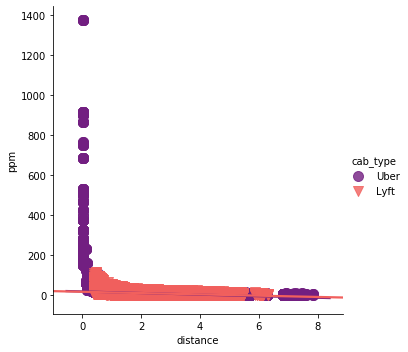

In [9]:
sns.lmplot(x='distance',y='ppm',data=c,hue='cab_type',palette='magma',
           markers=['o','v'],scatter_kws={'s':100})

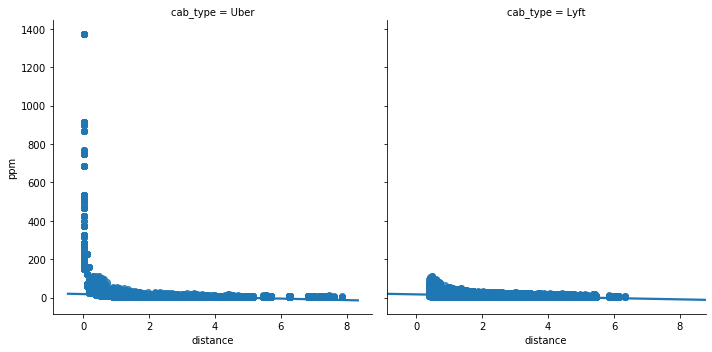

In [18]:
sns.lmplot(x='distance',y='ppm',data=c,col='cab_type')


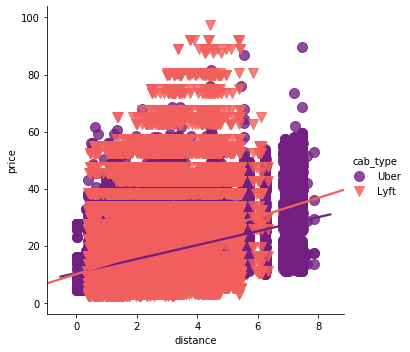

In [19]:
sns.lmplot(x='distance',y='price',data=b,hue='cab_type',palette='magma',
           markers=['o','v'],scatter_kws={'s':100})

In [13]:
c.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp', 'Date',
       'humidity', 'wind', 'Time', 'distance', 'cab_type', 'time_stamp',
       'Date ', 'Time', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'Time2', 'ppm'],
      dtype='object')

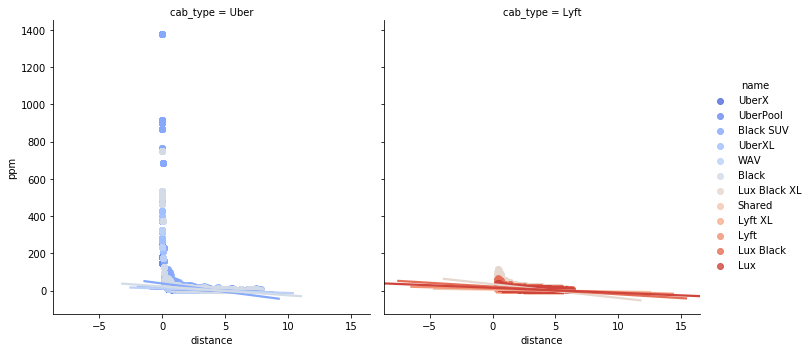

In [12]:
sns.lmplot(x='distance',y='ppm',data=c,col='cab_type',hue='name',palette='coolwarm')

In [14]:
c.corr()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,Time,distance,time_stamp,price,surge_multiplier,Time2,ppm
temp,1.000000,0.504693,-0.278630,0.147769,-0.273311,0.387265,0.115752,0.146952,0.039899,0.009659,0.006922,NaN,-0.016457,0.008076
clouds,0.504693,1.000000,-0.079788,0.186047,-0.097839,0.518758,0.041117,-0.042934,0.029497,-0.009156,0.002533,NaN,0.012590,-0.004443
pressure,-0.278630,-0.079788,1.000000,-0.045408,0.519631,-0.101814,-0.543793,0.017161,-0.040653,-0.051474,0.002907,NaN,0.021360,0.042854
rain,0.147769,0.186047,-0.045408,1.000000,-0.115389,0.188080,0.228594,0.167835,0.049540,0.033092,0.019216,NaN,0.023788,-0.028429
time_stamp,-0.273311,-0.097839,0.519631,-0.115389,1.000000,-0.288118,0.039846,0.059317,0.028941,-0.040168,0.013070,NaN,0.068763,-0.001068
humidity,0.387265,0.518758,-0.101814,0.188080,-0.288118,1.000000,-0.285823,-0.291592,0.007603,0.043199,-0.000876,NaN,-0.045133,0.002532
wind,0.115752,0.041117,-0.543793,0.228594,0.039846,-0.285823,1.000000,0.230106,0.054651,0.040267,0.006594,NaN,0.045052,-0.025214
Time,0.146952,-0.042934,0.017161,0.167835,0.059317,-0.291592,0.230106,1.000000,0.024501,0.027021,-0.002239,NaN,-0.001351,-0.009107
distance,0.039899,0.029497,-0.040653,0.049540,0.028941,0.007603,0.054651,0.024501,1.000000,0.005891,0.345061,0.025100,0.012094,-0.299697
time_stamp,0.009659,-0.009156,-0.051474,0.033092,-0.040168,0.043199,0.040267,0.027021,0.005891,1.000000,0.027383,0.067351,-0.042095,-0.008727


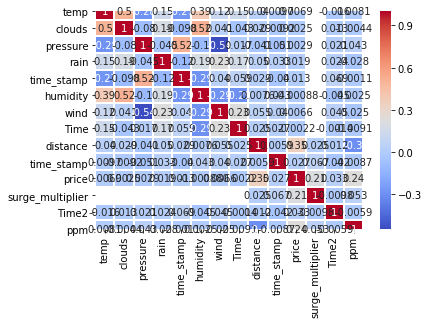

In [15]:
sns.heatmap(c.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=1)

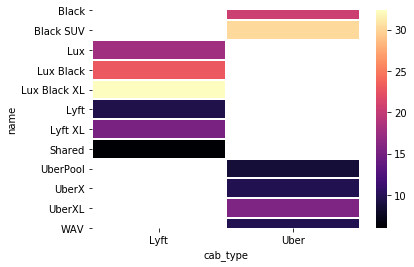

In [16]:
d = c.pivot_table(values='price',index='name',columns='cab_type')
sns.heatmap(d,cmap='magma',linecolor='white',linewidths=1)

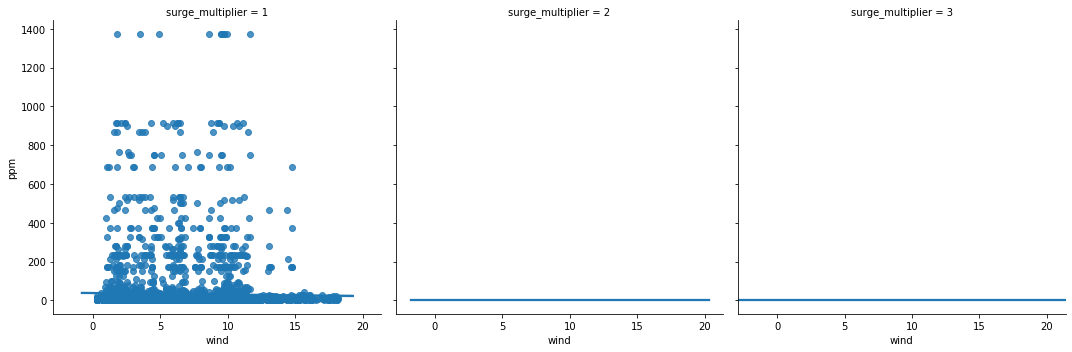

In [17]:
sns.lmplot(x="wind",y="ppm",col="surge_multiplier",data=c)